<a href="https://colab.research.google.com/github/Fayjul/Machine-Learning/blob/master/DataScienceFinalAssignment(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A DataFrame is a two-dimensional data structure in which the data is aligned in a tabular form i.e. in rows and columns.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from google.colab import files
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score


In [ ]:

# uploaded_file = files.upload()


In [ ]:
df = pd.read_csv('student-mat.csv', sep=';')

In [ ]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
#The size of the data table.
df.shape

(395, 33)

In [ ]:
#The column names of dataset
print(df.columns)
#student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.isnull().sum().sum()


0

In [ ]:

df.drop_duplicates()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
df.shape

(395, 33)

Since there is no duplicate data, the shape of the data remail unchanged. 

In [ ]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
age = df['age']
age

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64

In [ ]:
age.nunique()

8

In [ ]:
df = df.replace({'sex': {'F':0,'M':1}}) 
df = df.replace({'school': {'GP':0,'MS':1}}) 
df = df.replace({'address': {'U':0,'R':1}})
df = df.replace({'famsize': {'LE3':0,'GT3':1}}) 
df = df.replace({'Pstatus': {'A':0,'T':1}}) 
df = df.replace({'Mjob': {'at_home':0,'health':1,'other':2,'services':3,'teacher':4}})
df = df.replace({'Fjob': {'at_home':0,'health':1,'other':2,'services':3,'teacher':4}}) 
df = df.replace({'reason': {'course':0,'other':1,'home':2,'reputation':3}}) 
df = df.replace({'guardian': {'other':0,'mother':1,'father':2}}) 
df = df.replace({'schoolsup': {'no':0,'yes':1}})
df = df.replace({'paid': {'no':0,'yes':1}}) 
df = df.replace({'famsup': {'no':0,'yes':1}})
df = df.replace({'activities': {'no':0,'yes':1}}) 
df = df.replace({'nursery': {'no':0,'yes':1}})
df = df.replace({'higher': {'no':0,'yes':1}})
df = df.replace({'internet': {'no':0,'yes':1}})
df = df.replace({'romantic': {'no':0,'yes':1}})

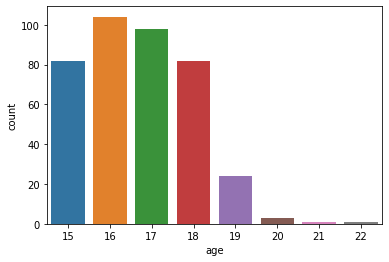

In [ ]:
sns.countplot(x='age', data=df)


In [ ]:
#plt.scatter(x=df['G1']+df['G2'], y=df['G3'])

In [ ]:
corelation = df.corr()

In [ ]:
print(corelation)

              school       age   address  ...        G1        G2        G3
school      1.000000  0.377610  0.279797  ... -0.025731 -0.050086 -0.045017
age         0.377610  1.000000  0.146722  ... -0.064081 -0.143474 -0.161579
address     0.279797  0.146722  1.000000  ... -0.069704 -0.126037 -0.105756
famsize    -0.064866 -0.037847  0.072472  ... -0.071445 -0.081223 -0.081407
Pstatus     0.045923  0.029598  0.042572  ... -0.016868 -0.041382 -0.058009
Medu       -0.133333 -0.163658 -0.138804  ...  0.205341  0.215527  0.217147
Fedu       -0.079807 -0.163438 -0.072178  ...  0.190270  0.164893  0.152457
Mjob       -0.056670 -0.069104 -0.108818  ...  0.081674  0.097390  0.102082
Fjob        0.018974 -0.035191  0.001911  ...  0.057661  0.067006  0.042286
reason     -0.130047 -0.014763 -0.018625  ...  0.093065  0.107285  0.099773
guardian   -0.011109 -0.290485 -0.044512  ...  0.041727  0.087495  0.070109
traveltime  0.242308  0.070641  0.328096  ... -0.093040 -0.153198 -0.117142
studytime  -

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

IndexError: ignored

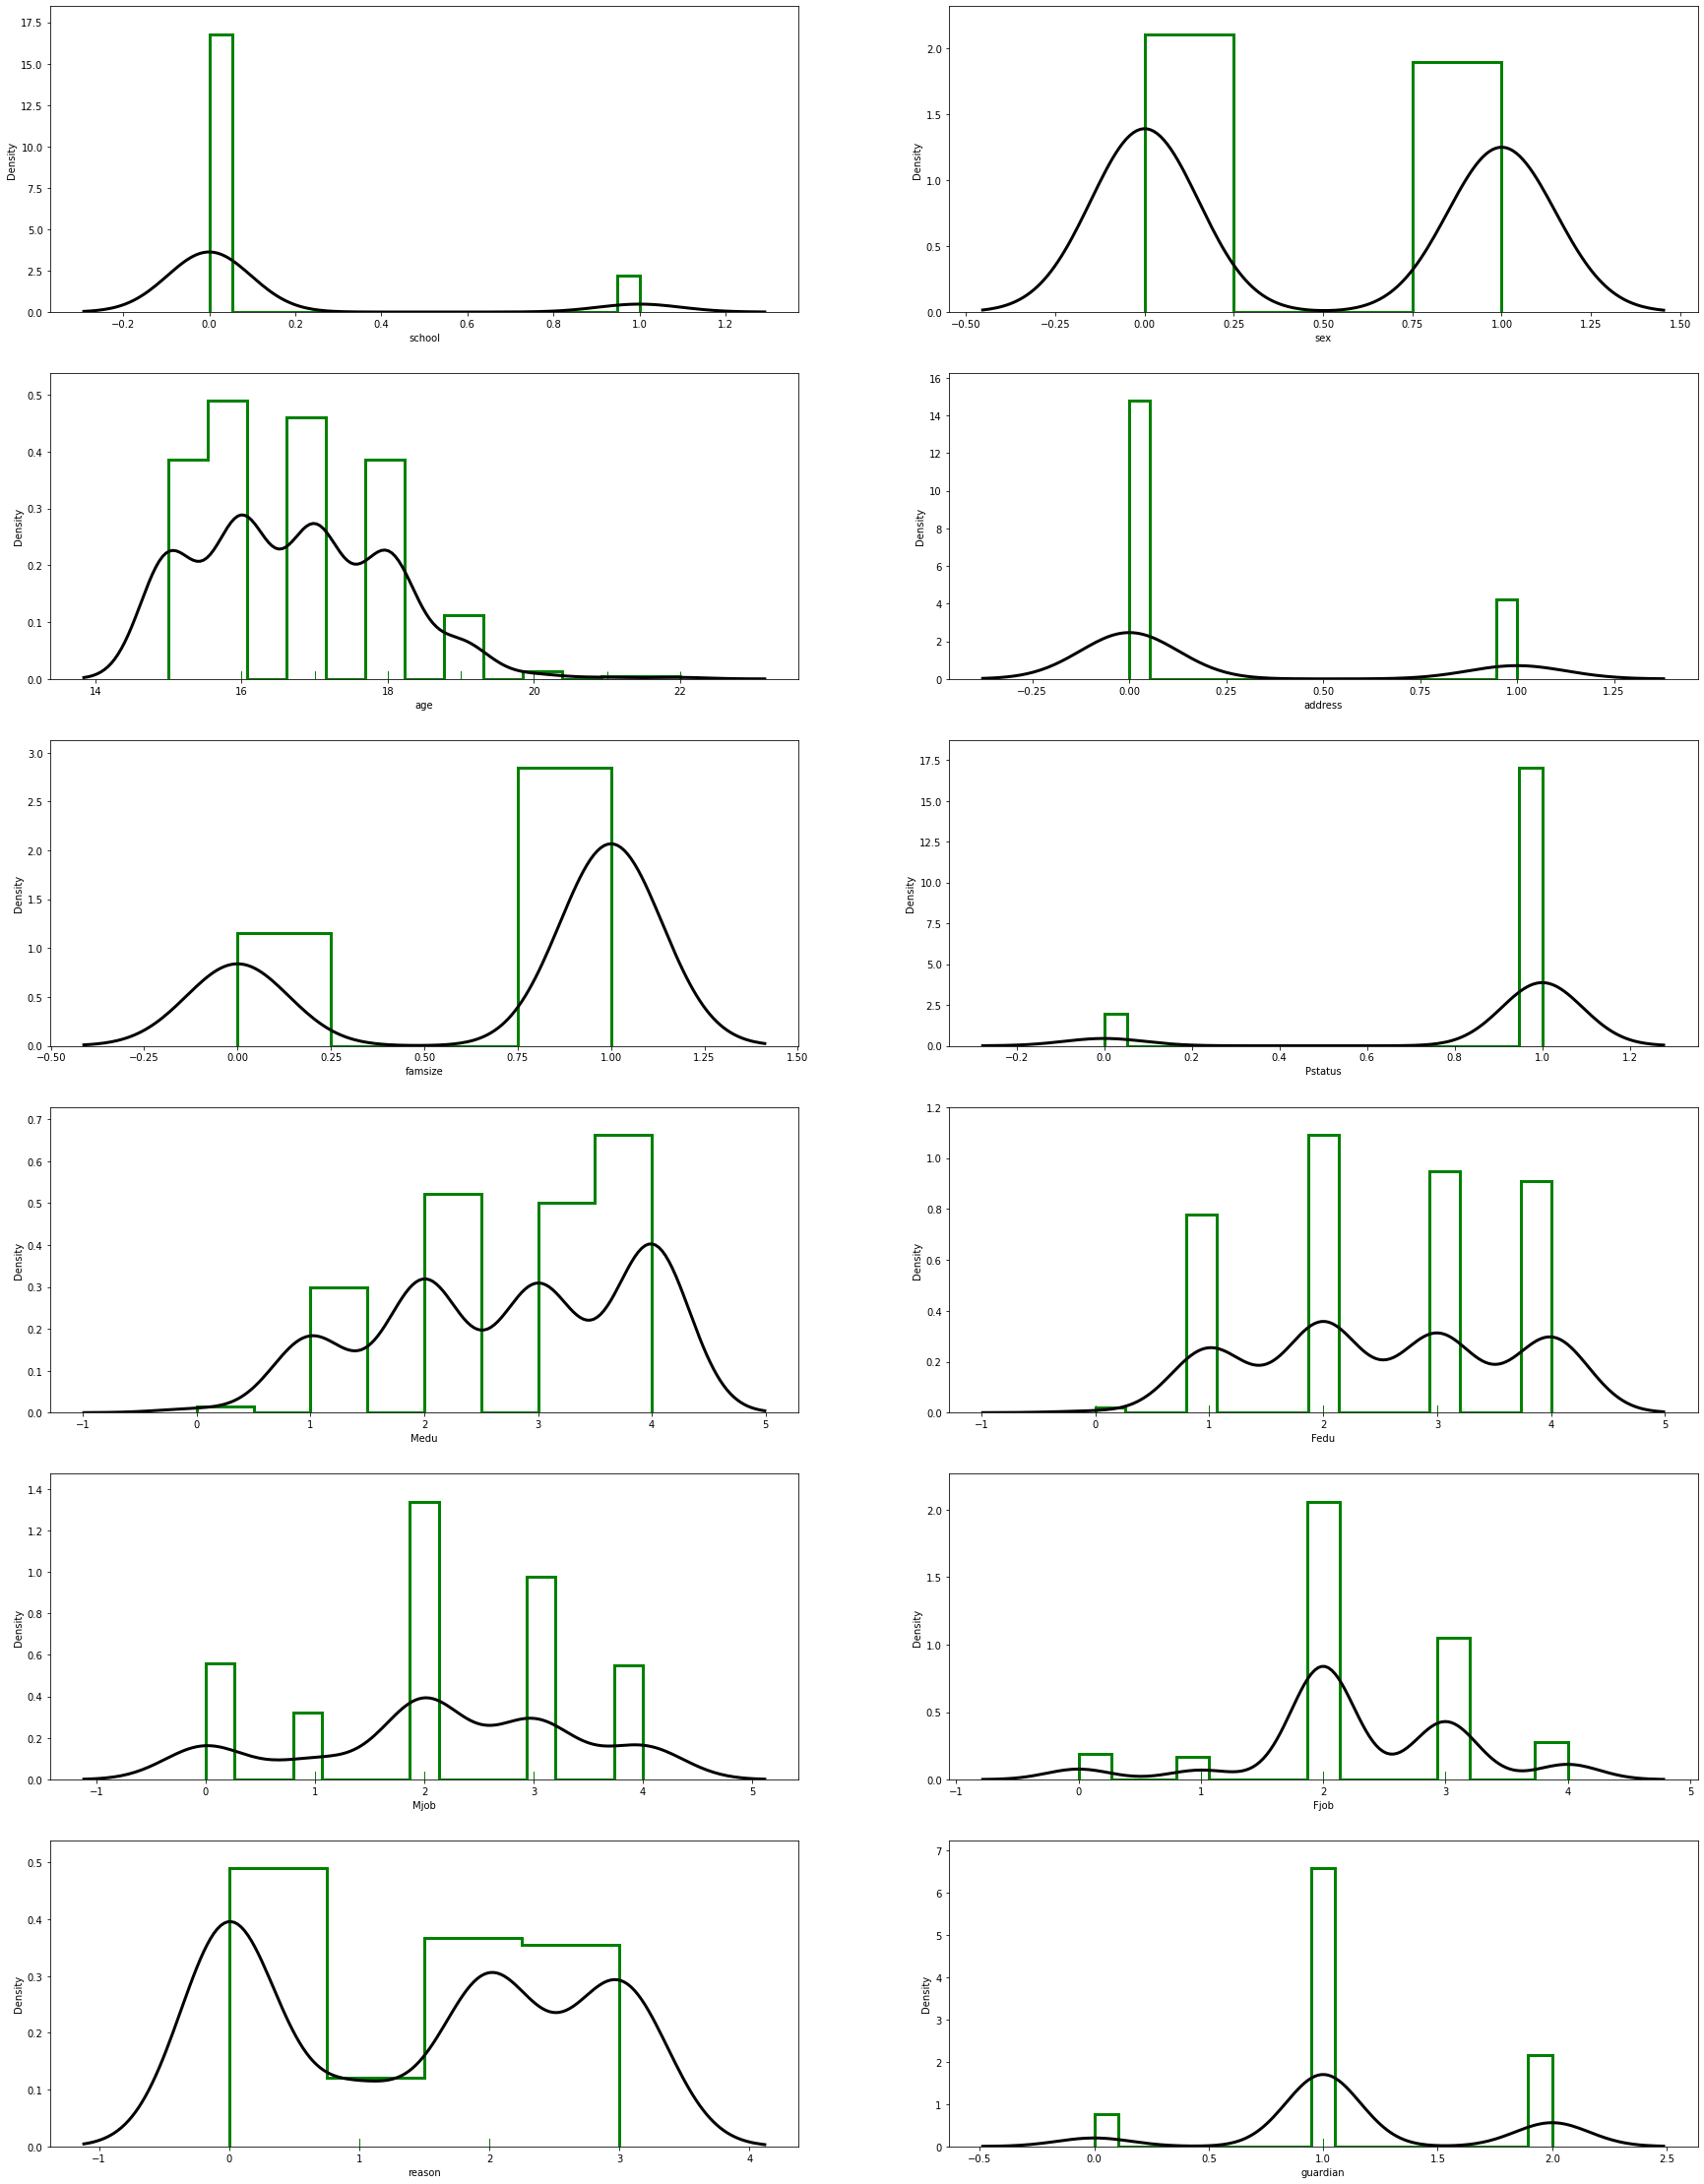

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 6, figsize = (30, 40), squeeze=False)
index = 0
ax = ax.flatten()

for col in list(df.columns):
    sns.distplot(df[col], ax=ax[index], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},

                  hist_kws={"histtype": "step", "linewidth": 3,

                            "alpha": 1, "color": "g"})
    index += 1

plt.draw()

ValueError: ignored

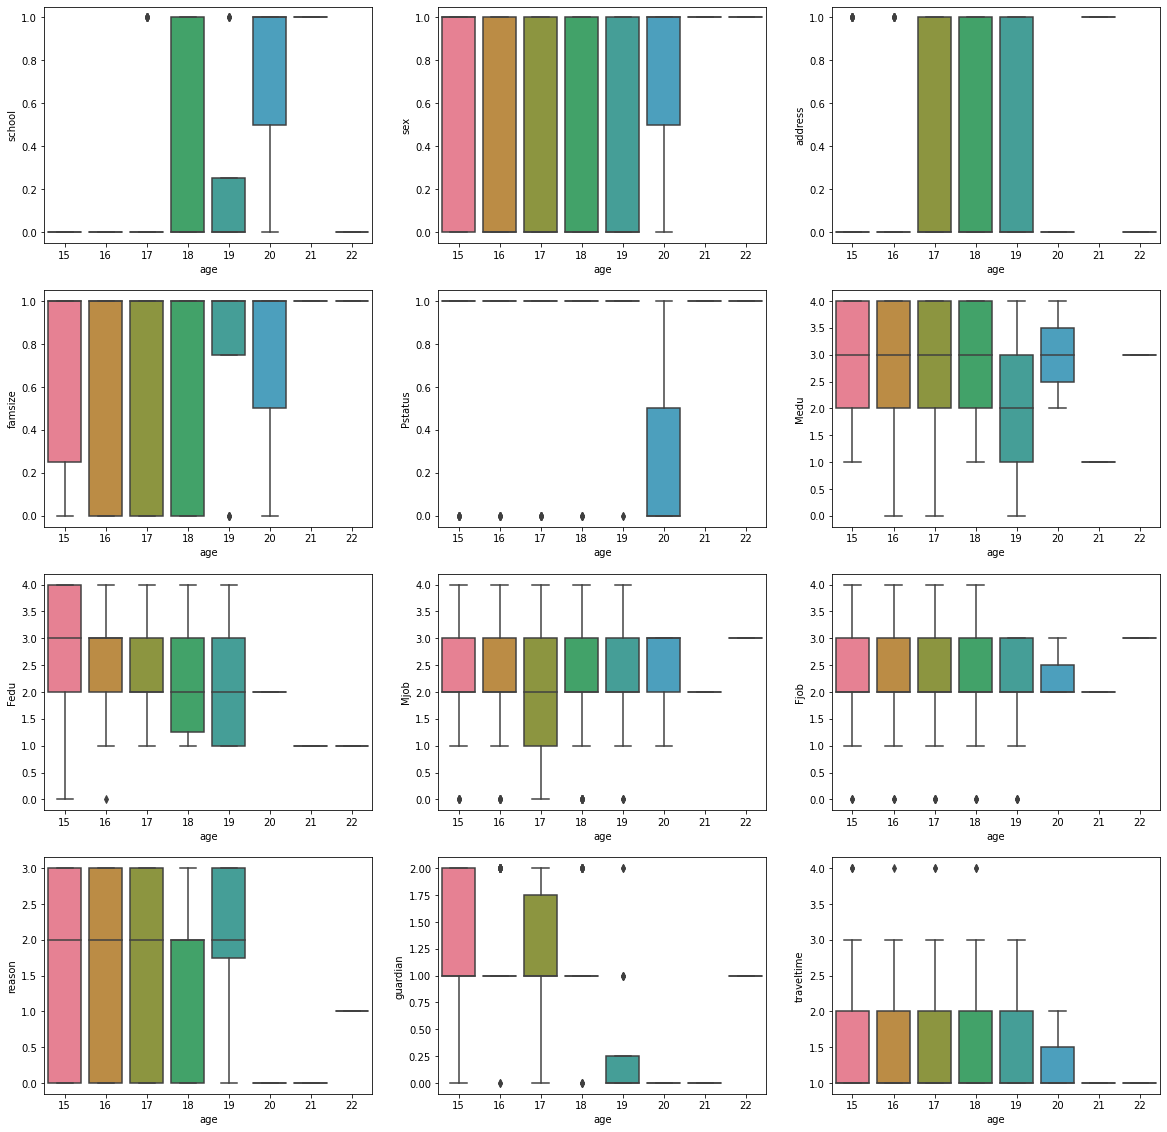

In [ ]:

# 
# res = df['G1']+df['G2']+df['G3']
plt.figure(figsize = (20,20))
for i,col in enumerate(df.drop('age',axis =1).columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = col, x = 'age',data = df,palette="husl")
plt.show()



In [ ]:
sex = df['sex']
res = df['G1']+df['G2']+df['G3']
cor_sex_res = sex.corr(res) 
print(cor_sex_res)



0.10112200473758139


Gender is not a fact for study. 

In [ ]:
traveltime = df['traveltime']
cor_traveltime_res = traveltime.corr(res)
print(cor_traveltime_res)

-0.12819716282790047


In [ ]:
# df = df.replace({'Pstatus': {'T':1,'A':0}})
Pstatus = df['Pstatus']
cor_Pstatus_res = Pstatus.corr(res)
print(cor_Pstatus_res)

-0.04304758133728402


In [ ]:
health = df['health']
cor_health_res = health.corr(res)
print(cor_health_res)

-0.08038037598606075


In [ ]:
goout = df['goout']
cor_goout_res = goout.corr(res)
print(cor_goout_res)

-0.15451133646504933


In [ ]:
Walc = df['Walc']
cor_Walc_res = res.corr(Walc)
print(cor_Walc_res)

-0.08802467108072587


In [ ]:
Dalc = df['Dalc']
cor_Dalc_res = res.corr(Dalc)
print(cor_Dalc_res)

-0.07250817752779407


In [ ]:
# df = df.replace({'famsup': {'yes':1,'no':0}}) 

In [ ]:

print(res.corr(df['famsup']))
print(res.corr(df['studytime']))
print(res.corr(df['failures']))
print(df['Dalc'].corr(df['Walc']))
print(df['failures'].corr(df['Walc']))
# print(res.corr(df['studytime']))


-0.06155336912440804
0.1345647188664067
-0.37575889592699535
0.6475442300180083
0.14196202998571536


<h1 align='center'> Task 2</h1>

In [ ]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.711392,0.896203,2.749367,2.521519,2.169620,2.281013,1.440506,1.146835,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,1.231309,0.536684,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


##Scaling using standard scaler

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['Walc', 'Dalc']] = scaler.fit_transform(df[['Walc', 'Dalc']].to_numpy())

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

<h1 align='center'> Task 3 </h1>

##Question: What will be the results G1,G2, G3 if other columns are given ? 

In [ ]:
from sklearn import linear_model

lasso_regressor= linear_model.Lasso(alpha=0.1)
lasso_regressor.fit(X_train,y_train)

y_pred=lasso_regressor.predict(X_test)

lasso_error = r2_score(y_test,y_pred)


In [ ]:
ridge_regressor= linear_model.Ridge()
ridge_regressor.fit(X_train,y_train)

y_pred=ridge_regressor.predict(X_test)

ridge_error = r2_score(y_test,y_pred)

In [ ]:
from sklearn.svm import SVR 

svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly')
svm_rbf= SVR(kernel='rbf')

svm_linear.fit(X_train,y_train)
svm_poly.fit(X_train,y_train)
svm_rbf.fit(X_train,y_train)

y_pred=svm_linear.predict(X_test)

y_pred=np.floor(y_pred)
linear_svm_error = r2_score(y_test,y_pred)


y_pred=svm_poly.predict(X_test)

poly_svm_error = r2_score(y_test,y_pred)

y_pred=svm_rbf.predict(X_test)

rbf_svm_error = r2_score(y_test,y_pred)

In [ ]:
print(lasso_error,ridge_error,linear_svm_error,poly_svm_error,rbf_svm_error)

0.881699230234672 0.8555022184837625 0.882214927995192 0.8612174115125152 0.8734358422259556


<h1 align= middle> Testing</h1>

In [ ]:
Error_dict={}

Text(0, 0.5, 'Predicted values')

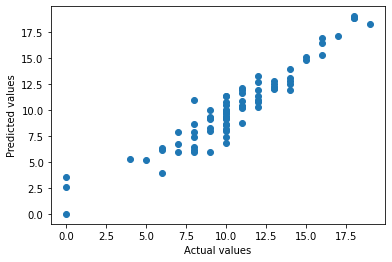

In [ ]:
from sklearn import linear_model

lasso_regressor= linear_model.Lasso(alpha=0.1)
lasso_regressor.fit(X_train,y_train)

y_pred=lasso_regressor.predict(X_test)

Error_dict['lasso_r_squared_value']=r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

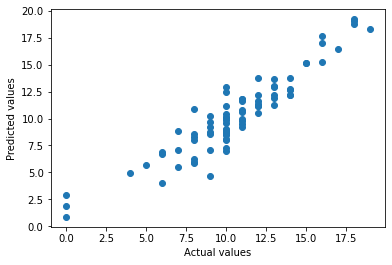

In [ ]:
ridge_regressor= linear_model.Ridge()
ridge_regressor.fit(X_train,y_train)

y_pred=ridge_regressor.predict(X_test)

Error_dict['ridge_r_squared_value']=r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.svm import SVR 

svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly')
svm_rbf= SVR(kernel='rbf')

svm_linear.fit(X_train,y_train)
svm_poly.fit(X_train,y_train)
svm_rbf.fit(X_train,y_train)

y_pred=svm_linear.predict(X_test)


Error_dict['svm_linear_r_squared_value']=r2_score(y_test,y_pred)


y_pred=svm_poly.predict(X_test)

Error_dict['svm_poly_r_squared_value']=r2_score(y_test,y_pred)
y_pred=svm_rbf.predict(X_test)

rbf_svm_r_squared_value = r2_score(y_test,y_pred)
Error_dict['svm_rbf_r_squared_value']=r2_score(y_test,y_pred)

In [ ]:
Error_dict

{'lasso_r_squared_value': 0.881699230234672,
 'ridge_r_squared_value': 0.8555022184837625,
 'svm_linear_r_squared_value': 0.895904057314183,
 'svm_poly_r_squared_value': 0.8612174115125152,
 'svm_rbf_r_squared_value': 0.8734358422259556}

In [ ]:
X_short=X[['Medu','Fedu','studytime','failures',]]


In [ ]:
X_short.shape

(395, 4)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_short,y,test_size=0.2,random_state=32)

In [ ]:
Error_dict_4features={}

In [ ]:
ridge_regressor= linear_model.Ridge()
ridge_regressor.fit(X_train,y_train)

y_pred=ridge_regressor.predict(X_test)

ridge_r_squared_value = r2_score(y_test,y_pred)
Error_dict_4features['ridge_r_squared_value']=r2_score(y_test,y_pred)

In [ ]:
lasso_regressor= linear_model.Lasso(alpha=0.1)
lasso_regressor.fit(X_train,y_train)

y_pred=lasso_regressor.predict(X_test)

Error_dict_5features['lasso_r_squared_value']=r2_score(y_test,y_pred)

In [ ]:
from sklearn.svm import SVR 


svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly')
svm_rbf= SVR(kernel='rbf')

svm_linear.fit(X_train,y_train)
svm_poly.fit(X_train,y_train)
svm_rbf.fit(X_train,y_train)

y_pred=svm_linear.predict(X_test)


Error_dict_4features['svm_linear_r_squared_value']=r2_score(y_test,y_pred)


y_pred=svm_poly.predict(X_test)

Error_dict_4features['svm_poly_r_squared_value']=r2_score(y_test,y_pred)
y_pred=svm_rbf.predict(X_test)

rbf_svm_r_squared_value = r2_score(y_test,y_pred)
Error_dict_4features['svm_rbf_r_squared_value']=r2_score(y_test,y_pred)

In [ ]:
Error_dict_4features

{'ridge_r_squared_value': 0.04619553956063083,
 'svm_linear_r_squared_value': 0.058254459332836905,
 'svm_poly_r_squared_value': 0.060839232310443414,
 'svm_rbf_r_squared_value': 0.043063202523174415}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Before')

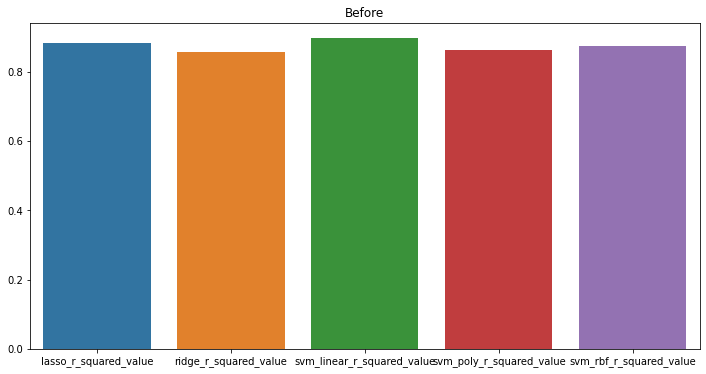

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(list(Error_dict.keys()),list(Error_dict.values()))
plt.title("Before")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After')

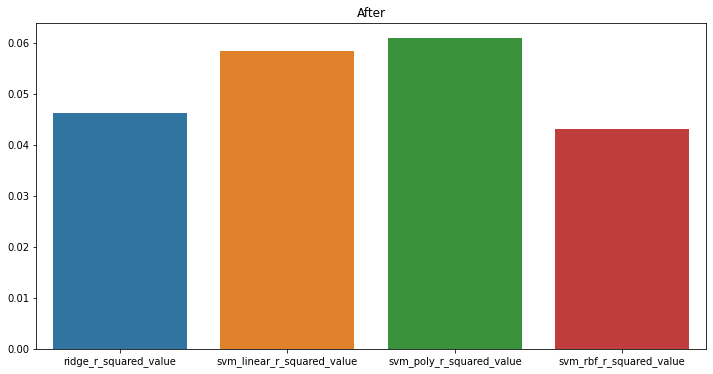

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(list(Error_dict_4features.keys()),list(Error_dict_4features.values()))
plt.title("After")